In [1]:
# 2. Working with Text Data [20 pts]
# Text data is the most common form of data and is widely used in machine learning. In this section,
# you will learn techniques for pre-processing and model building using text data.
# First of all, you will need to work through some examples and become familiar with text processing techniques.
# Below is the link to a tutorial on SciKit Learn:
# http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [2]:
################################################################################################################################
#
# Dataset: Twitter US Airline Sentiment
# Reference: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
# Description: Contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines
#
################################################################################################################################

In [8]:
########################################################################
#	Loading and inspecting the dataset
########################################################################

# Reading dataset
import pandas as pd
categories = ['positive', 'negative','neutral']
import os
dirName = os.path.dirname(os.path.abspath("Tweets.csv"))
Tweet = pd.read_csv(dirName + "\Tweets.csv")

#Tweet = pd.read_csv("C:/Users/Arun/Desktop/Abhi/UTD/Spring'18/Machine learning/Lab/2/Tweets/Tweets.csv")

In [9]:
Tweet.shape

(14640, 15)

In [10]:
# Hence, we have 14640 samples and 15 features

In [11]:
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
Tweet = Tweet.drop(['airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis = 1)

In [13]:
Tweet.head()

,tweet_id,airline_sentiment,airline,name,retweet_count,text
0,570306133677760513,neutral,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...


In [14]:
Tweet.shape

(14640, 6)

In [15]:
# Hence, we have dropped few of the columns and we are left with 6 features only.

In [16]:
# Groupby airline, and reference the airline_sentiment column and then extract total count
print(Tweet.groupby('airline')['airline_sentiment'].count())

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


In [17]:
# groupby both airlines and airline_sentiment and extract total count
print(Tweet.groupby(['airline','airline_sentiment']).count().iloc[:,0])

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64


In [18]:
# From above results, we observe that United airways has more negative sentiments. But, we have assumed that correctly identified 
# airline being referenced in the tweet text and hence we need to clean the data

In [19]:
#Here we checking airline mismatch tweets
observation = list(Tweet.iloc[6750:6755,2])
#print(observation)
tweet_text = list(Tweet.iloc[6750:6755,5])
#print(tweet_text)

for pos, item in enumerate(observation):
    print('Airline as compiled: ' + str(item))
    print('The actual tweet text: ')
    print(tweet_text[pos], '\n''\n')

Airline as compiled: Delta
The actual tweet text: 
@JetBlue everyone is here but our pilots are no where to be found and my last flight the plane was dirty that I had to clean my area &amp; seat! 


Airline as compiled: Delta
The actual tweet text: 
@JetBlue update on Flight 462 would be appreciated when you have time, thanks 


Airline as compiled: Delta
The actual tweet text: 
@JetBlue check DM please :) 


Airline as compiled: Delta
The actual tweet text: 
@JetBlue Hey guys, why did my last flight earn me 0 pts? http://t.co/1syWlmTZek 


Airline as compiled: Delta
The actual tweet text: 
@JetBlue 2 aisles of empty #evermoreroom seats and we can't move bc we didn't pay?! #nonsense #Waste #JetBlue #jetbluebos #cheap 




In [20]:
# Trying to replace mismatch airline data, hence we will fetch first tag from the tweet text 
observation = list(Tweet.iloc[:,2])
tweet_text = list(Tweet.iloc[:,5])
import re
for pos, item in enumerate(observation):
    a =re.findall('\@[A-Za-z]+',tweet_text[pos],flags=0)[0]
    if(a.lower() != "@" + str(item).replace(" ", "").lower() and a.lower() != "@" + str(item).replace(" ", "").lower()+"air"): 
        Tweet.iloc[pos,2] = Tweet.iloc[pos,2].replace(Tweet.iloc[pos,2],a[1:])

In [21]:
#After preprocessing the misclassified data
observation = list(Tweet.iloc[6750:6755,2])
tweet_text = list(Tweet.iloc[6750:6755,5])

for pos, item in enumerate(observation):
    print('Airline as compiled: ' + str(item))
    print('The actual tweet text: ')
    print(tweet_text[pos], '\n''\n')

Airline as compiled: JetBlue
The actual tweet text: 
@JetBlue everyone is here but our pilots are no where to be found and my last flight the plane was dirty that I had to clean my area &amp; seat! 


Airline as compiled: JetBlue
The actual tweet text: 
@JetBlue update on Flight 462 would be appreciated when you have time, thanks 


Airline as compiled: JetBlue
The actual tweet text: 
@JetBlue check DM please :) 


Airline as compiled: JetBlue
The actual tweet text: 
@JetBlue Hey guys, why did my last flight earn me 0 pts? http://t.co/1syWlmTZek 


Airline as compiled: JetBlue
The actual tweet text: 
@JetBlue 2 aisles of empty #evermoreroom seats and we can't move bc we didn't pay?! #nonsense #Waste #JetBlue #jetbluebos #cheap 




In [23]:
print(Tweet.groupby('airline')['airline_sentiment'].count())

airline
AlbertBreer           1
American           2754
AndrewFallis          1
CatfoodBeerGlue       1
DadBoner              1
DeltaAssist           2
HillAConlin           1
Imaginedragons        1
InternJohnRadio       1
JetBlue            2167
Jetblue               4
KCIAirport            1
MandarinJourney       1
MelissaAFrancis       1
NinaDavuluri          1
Sb                    1
Southwest          2416
SouthwestAir          1
US Airways         2905
United             3817
Virgin America      504
chasefoster           1
djevolutionhd         1
eatgregeat            1
jetblue              44
lindaSWC              1
malhoit               1
nrhodes               2
nytimes               1
ods                   1
sarahpompei           1
scm                   1
shannonwoodward       1
timbennettg           1
vanessaannz           1
Name: airline_sentiment, dtype: int64


In [24]:
observation = list(Tweet.iloc[:,2])
for pos, item in enumerate(observation):
    if(str(item).lower() == 'jetblue'):
        Tweet.iloc[pos,2] = 'JetBlue'
#print(Tweet.groupby('airline')['airline_sentiment'].count())

In [25]:
#Removing unwnated usertags in airline column 
airline_list = ['virginamerica','united','southwest','american','jetblue','usairways']
observation = list(Tweet.iloc[:,2])
posList = []
for pos, item in enumerate(observation):
    if(str(item).replace(" ", "").lower() not in airline_list):
        posList.append(pos)
Tweet.drop(Tweet.index[posList],inplace=True)

In [26]:
print(Tweet.groupby('airline')['airline_sentiment'].count())

airline
American          2754
JetBlue           2215
Southwest         2416
US Airways        2905
United            3817
Virgin America     504
Name: airline_sentiment, dtype: int64


Text(0.5,0,'Sentiment expressed in tweets')

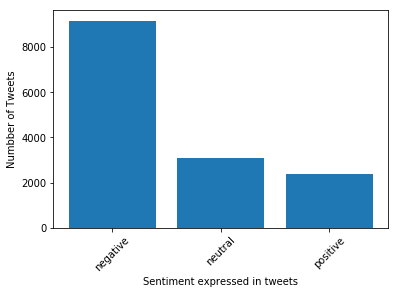

In [27]:
########################################################################
# 	Visualization of data
########################################################################
%matplotlib inline  
import matplotlib.pyplot as plt 
Index = [1, 2, 3]
plt.bar(Index,Tweet.airline_sentiment.value_counts())
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Numbber of Tweets')
plt.xlabel('Sentiment expressed in tweets')

In [28]:
print(Tweet.groupby(["airline","airline_sentiment"]).size().unstack())

airline_sentiment  negative  neutral  positive
airline                                       
American               1957      461       336
JetBlue                 952      721       542
Southwest              1185      662       569
US Airways             2256      380       269
United                 2630      696       491
Virgin America          181      171       152


In [29]:
########################################################################
#	Splitting data into train/test
########################################################################
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Tweet.text, Tweet.airline_sentiment, test_size=0.25, random_state=0)


In [30]:
#######################################################
# Extracting features from text files
#######################################################

# In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

# Tokenizing text with scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train)


In [31]:
count_vect.get_feature_names()

['00',
 '000',
 '000114',
 '000ft',
 '0011',
 '0016',
 '00a',
 '00am',
 '00pm',
 '01',
 '0162389030167',
 '0162424965446',
 '0167560070877',
 '0185',
 '01pm',
 '02',
 '03',
 '0316',
 '04',
 '0400',
 '05',
 '0510',
 '0530',
 '05am',
 '05pm',
 '06',
 '0600',
 '0638',
 '07',
 '0736',
 '0769',
 '08',
 '0985',
 '0_0',
 '0bjnz4eix5',
 '0cevy3p42b',
 '0ewj7oklji',
 '0hmmqczkcf',
 '0hxlnvzknp',
 '0jjt4x3yxg',
 '0jutcdrljl',
 '0liwecasoe',
 '0pdntgbxc6',
 '0prgysvurm',
 '0wbjawx7xd',
 '0xjared',
 '10',
 '100',
 '1000',
 '1000cost',
 '1002',
 '1007',
 '1008',
 '101',
 '1019',
 '1020',
 '1024',
 '1025',
 '1027',
 '103',
 '1030pm',
 '1032',
 '1038',
 '104',
 '1041',
 '1051',
 '1058',
 '1065',
 '1071',
 '1074',
 '1079871763',
 '1080',
 '1081',
 '1086',
 '108639',
 '1089',
 '1098',
 '1099',
 '10a',
 '10am',
 '10f',
 '10hrs',
 '10m',
 '10min',
 '10mins',
 '10p',
 '10pm',
 '10th',
 '10tmthvfdc',
 '10x',
 '10yr',
 '11',
 '1101',
 '1106',
 '1108',
 '1109',
 '1114',
 '1117',
 '1120am',
 '1125',
 '1130',


In [32]:
# Calculating tf (term frequencies => occurence of a word / total number of words in the document)
# Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and
# are therefore less informative than those that occur only in a smaller portion of the corpus.
# This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

# Both tf and tf–idf can be computed as follows:

#from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
#X_train_tf = tf_transformer.transform(X_train_counts)

In [34]:
# Alternative to above code snippet
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [35]:
#################################################################################################################################
# Training a classifier -> we can train a classifier to try to predict the sentiment of a tweet
#################################################################################################################################
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [36]:
#################################################################################################################################
# Prediction
#################################################################################################################################

X_new_counts = count_vect.transform(x_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)


In [37]:
#######################################################
# Building a pipeline ->In order to make the vectorizer => transformer => classifier easier to work with, 
# scikit-learn provides a Pipeline class that behaves like a compound classifier:
#######################################################
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [38]:
text_clf.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [39]:
#######################################################
# Evaluation of the performance on the test set -> Evaluating the predictive accuracy of the model
#######################################################
import numpy as np
predicted = text_clf.predict(x_test)
np.mean(predicted == y_test)

0.6531617848343827

In [40]:
# confusion matrix
from sklearn import metrics 
metrics.confusion_matrix(y_test, predicted)

array([[2230,    5,    0],
       [ 697,   95,    8],
       [ 544,   13,   61]], dtype=int64)

In [41]:
#Trying out with GridSearch with different parameters
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-1, 1e-2,2e-2)
}

In [42]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [43]:
gs_clf = gs_clf.fit(x_train, y_train)

In [44]:
# best mean score
gs_clf.best_score_ 
print("Accuracy: ", gs_clf.best_score_ )

Accuracy:  0.774593903997


In [45]:
predicted = gs_clf.predict(x_test)

In [46]:
#Confusion matrix after applying GridsearchCV 
metrics.confusion_matrix(y_test, predicted)

array([[2145,   68,   22],
       [ 425,  328,   47],
       [ 224,   65,  329]], dtype=int64)

In [47]:
# parameter setting corresponding to above score
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__use_idf: False
vect__ngram_range: (1, 2)
